In [1]:
v<- c(0.9360514,0.8375647,0.7753784,
      0.7413904,0.5348064,0.2113981,
      0.4964131,0.3649066,0.9998654,
      0.8374608,0.6660899,0.7857080,
      0.2113981,0.5348064,0.5656764)

v

[1] 0.9360514 0.8375647 0.7753784 0.7413904 0.5348064 0.2113981 0.4964131
 [8] 0.3649066 0.9998654 0.8374608 0.6660899 0.7857080 0.2113981 0.5348064
[15] 0.5656764

In [2]:
library(png)
library(grid)
library(gridExtra)
library(plyr)
library(dplyr)
options(digits=20)  # this allows R to use decimals up to 20 places
options(repr.plot.width = 15, repr.plot.height = 20)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Create an image with arrays

In [3]:
ninePixelImage<- array(v,dim = c(3,3,3))
print(ninePixelImage)

, , 1

                       [,1]                   [,2]                   [,3]
[1,] 0.93605139999999997791 0.74139040000000000497 0.49641309999999999603
[2,] 0.83756470000000005083 0.53480640000000001510 0.36490660000000002539
[3,] 0.77537840000000002316 0.21139810000000000545 0.99986540000000001527

, , 2

                       [,1]                   [,2]                   [,3]
[1,] 0.83746080000000000521 0.21139810000000000545 0.93605139999999997791
[2,] 0.66608990000000001253 0.53480640000000001510 0.83756470000000005083
[3,] 0.78570799999999996199 0.56567639999999996814 0.77537840000000002316

, , 3

                       [,1]                   [,2]                   [,3]
[1,] 0.74139040000000000497 0.49641309999999999603 0.83746080000000000521
[2,] 0.53480640000000001510 0.36490660000000002539 0.66608990000000001253
[3,] 0.21139810000000000545 0.99986540000000001527 0.78570799999999996199



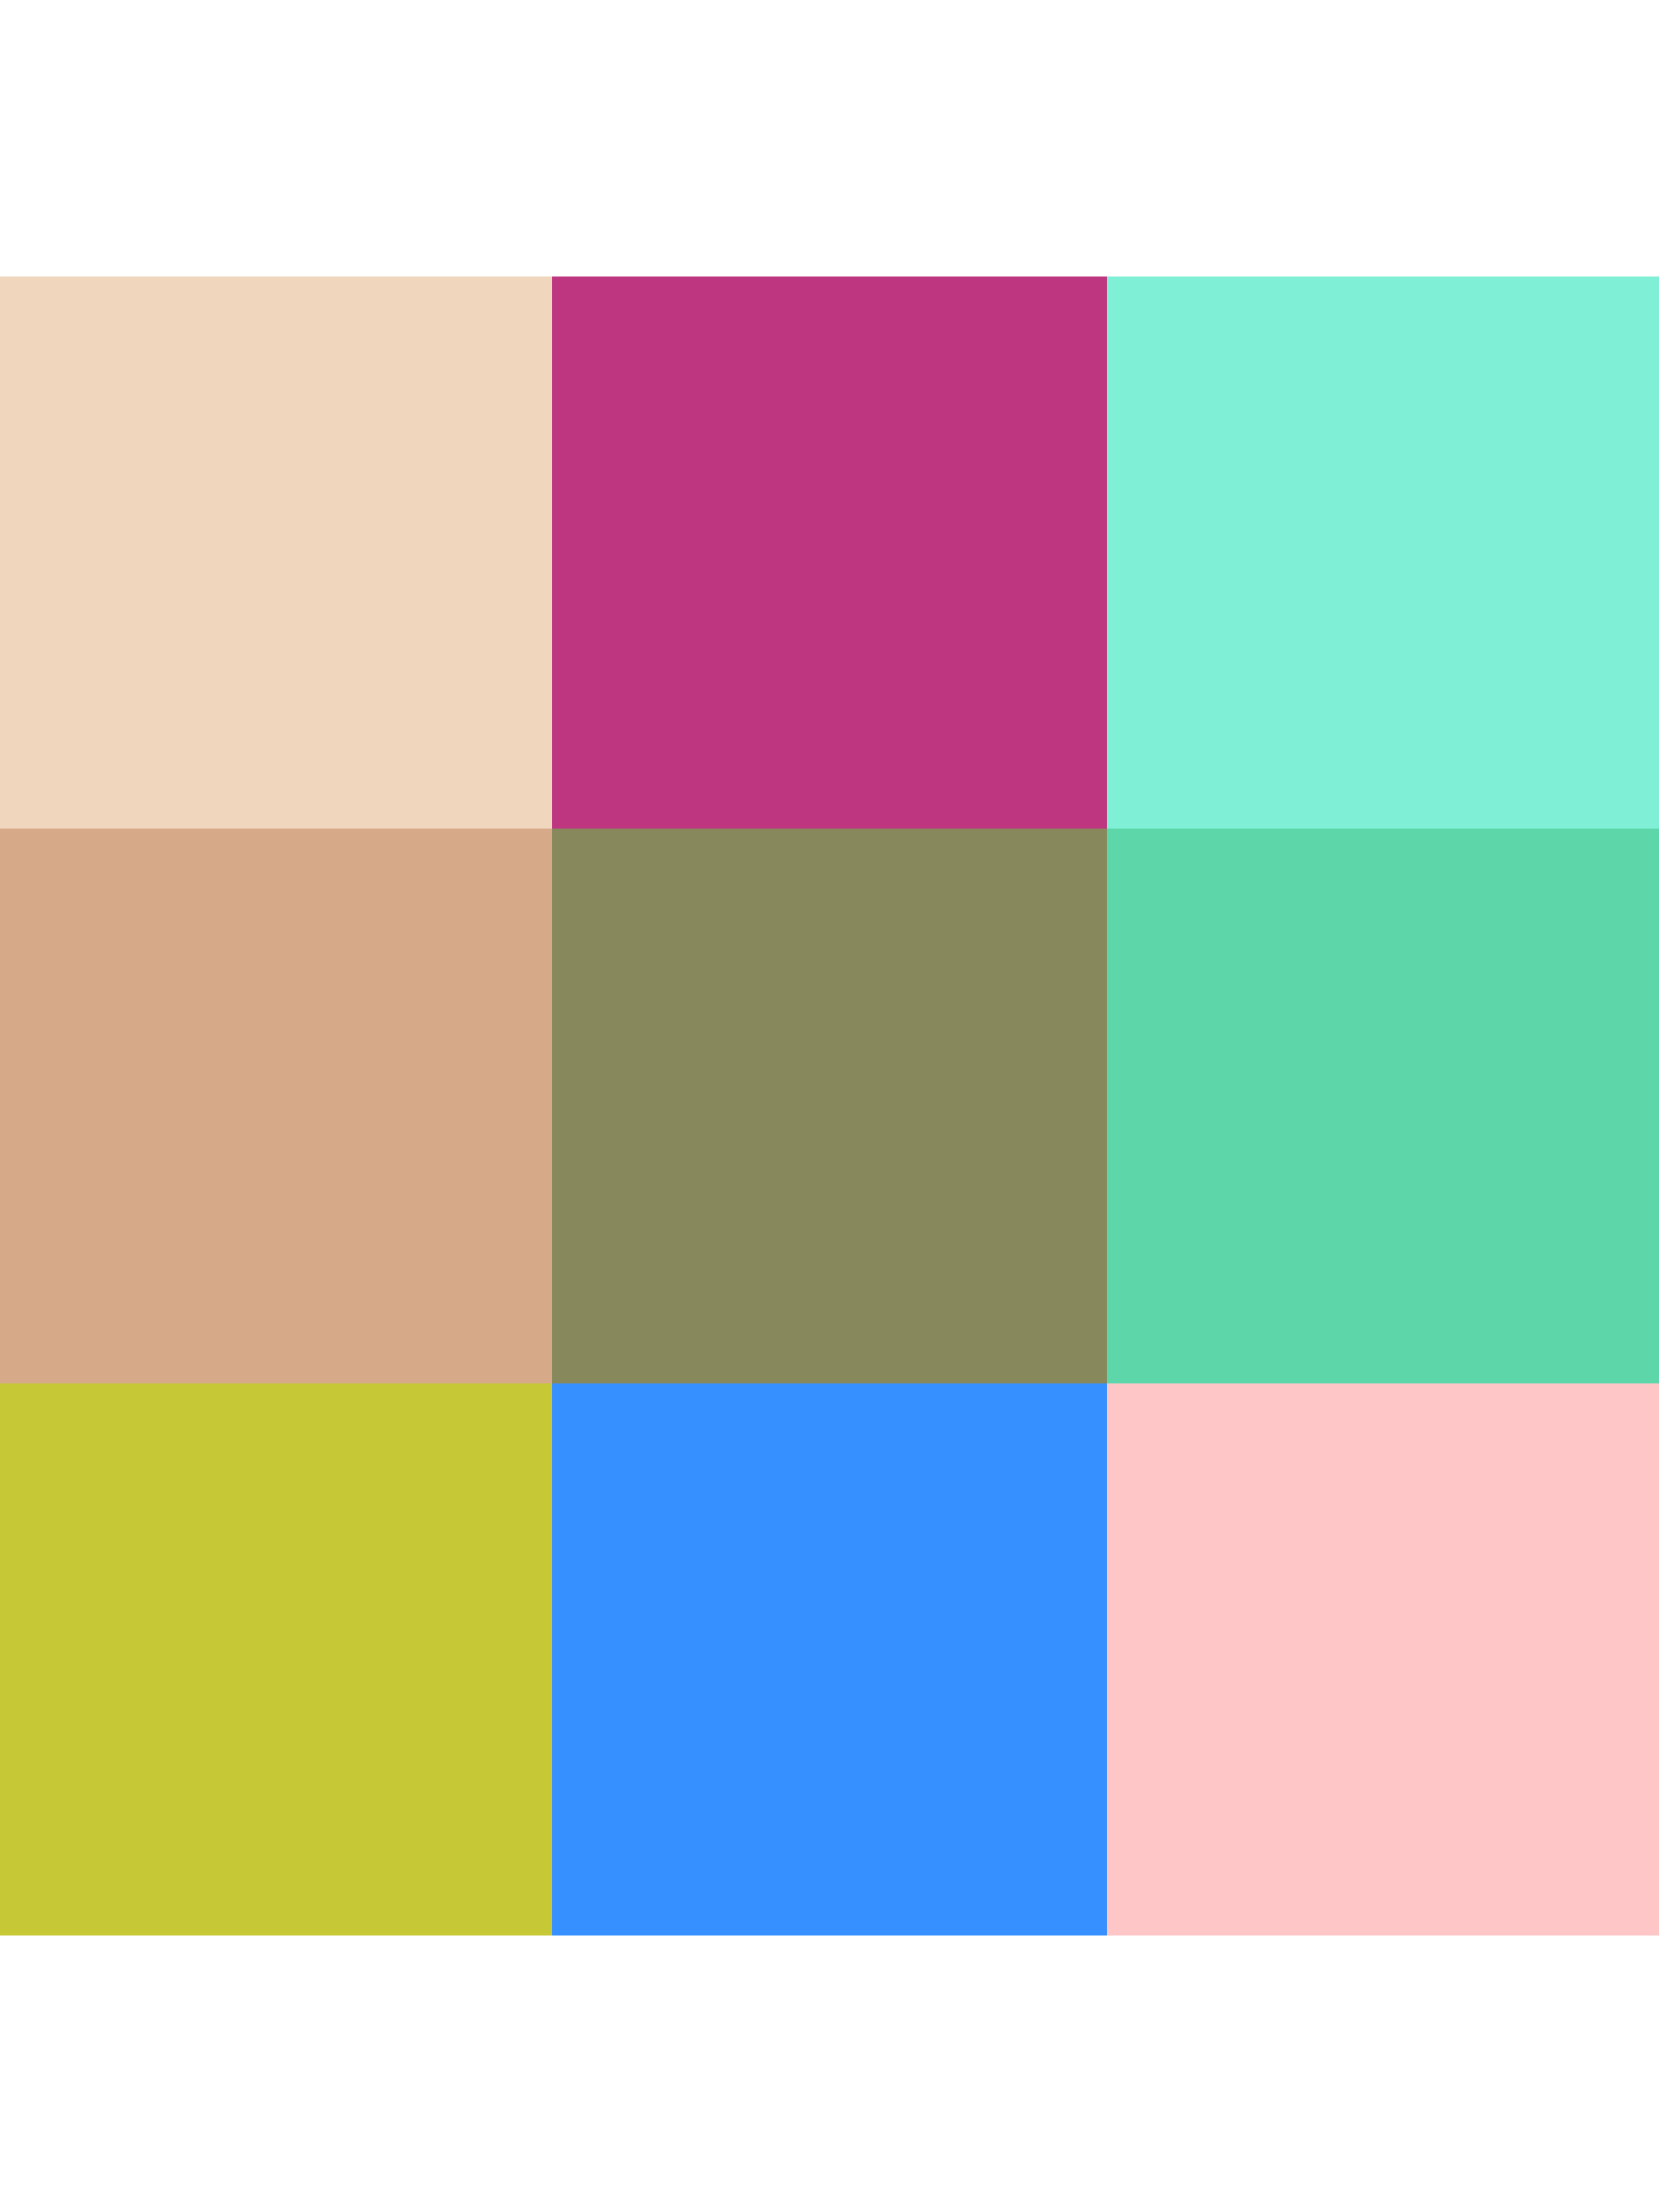

In [4]:
grid.raster(ninePixelImage, interpolate=FALSE)

In [5]:
histslide <- readPNG("/kaggle/input/lesions/lesions.png")
#grid.raster(histslide)

### remove the alpha channel (4th layer)

In [6]:
dim(histslide)   # how many dimensions?
histslide <- histslide[,,1:3]
dim(histslide)   # re-inspect

[1] 441 619   4

[1] 441 619   3

### we need to get our image into a dataframe

In [7]:
df <- data.frame(
    red = matrix(histslide[,,1], ncol=1),
    green = matrix(histslide[,,2], ncol=1),
    blue = matrix(histslide[,,3], ncol=1)
)

head(df)

,red,green,blue
,<dbl>,<dbl>,<dbl>
1,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320
2,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320
3,0.73725490196078435901,0.50980392156862741615,0.67058823529411759612
4,0.73725490196078435901,0.51372549019607838261,0.67450980392156867360
5,0.74901960784313725839,0.53333333333333332593,0.69019607843137253944
6,0.76078431372549015776,0.54509803921568622531,0.70196078431372543882


In [8]:
head(df)
unique(df)   # how many unqiue rows i.e. colours?

,red,green,blue
,<dbl>,<dbl>,<dbl>
1,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320
2,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320
3,0.73725490196078435901,0.50980392156862741615,0.67058823529411759612
4,0.73725490196078435901,0.51372549019607838261,0.67450980392156867360
5,0.74901960784313725839,0.53333333333333332593,0.69019607843137253944
6,0.76078431372549015776,0.54509803921568622531,0.70196078431372543882


,red,green,blue
,<dbl>,<dbl>,<dbl>
1,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320
3,0.73725490196078435901,0.50980392156862741615,0.67058823529411759612
4,0.73725490196078435901,0.51372549019607838261,0.67450980392156867360
5,0.74901960784313725839,0.53333333333333332593,0.69019607843137253944
6,0.76078431372549015776,0.54509803921568622531,0.70196078431372543882
7,0.75686274509803919130,0.54117647058823525885,0.69803921568627447236
8,0.73725490196078435901,0.52156862745098042655,0.67843137254901964006
9,0.72156862745098038214,0.50588235294117644969,0.66274509803921566320
10,0.71372549019607844922,0.50980392156862741615,0.66274509803921566320


In [9]:
K <- kmeans(df,3)


In [10]:
df$cluster <- K$cluster
head(df)

,red,green,blue,cluster
,<dbl>,<dbl>,<dbl>,<int>
1,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320,3
2,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320,3
3,0.73725490196078435901,0.50980392156862741615,0.67058823529411759612,3
4,0.73725490196078435901,0.51372549019607838261,0.67450980392156867360,3
5,0.74901960784313725839,0.53333333333333332593,0.69019607843137253944,3
6,0.76078431372549015776,0.54509803921568622531,0.70196078431372543882,3


### make a dateframe of the colours for the clusters

In [11]:
colours <- data.frame(K$centers,"cluster" = c(1:3))

In [12]:
colnames(colours) <- c("redCluster","greenCluster","blueCluster","cluster")

In [13]:
dfSegmented <- join(df,colours, by = "cluster")
head(dfSegmented)

,red,green,blue,cluster,redCluster,greenCluster,blueCluster
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320,3,0.79051469836102550293,0.59902319060794029237,0.74423284252169474851
2,0.73725490196078435901,0.49803921568627451677,0.66274509803921566320,3,0.79051469836102550293,0.59902319060794029237,0.74423284252169474851
3,0.73725490196078435901,0.50980392156862741615,0.67058823529411759612,3,0.79051469836102550293,0.59902319060794029237,0.74423284252169474851
4,0.73725490196078435901,0.51372549019607838261,0.67450980392156867360,3,0.79051469836102550293,0.59902319060794029237,0.74423284252169474851
5,0.74901960784313725839,0.53333333333333332593,0.69019607843137253944,3,0.79051469836102550293,0.59902319060794029237,0.74423284252169474851
6,0.76078431372549015776,0.54509803921568622531,0.70196078431372543882,3,0.79051469836102550293,0.59902319060794029237,0.74423284252169474851


### rebuild image

In [14]:
histSlideSegmented <- array(dfSegmented %>% 
                            select(redCluster,greenCluster,blueCluster) %>%
                            unlist %>% unname, dim = dim(histslide))

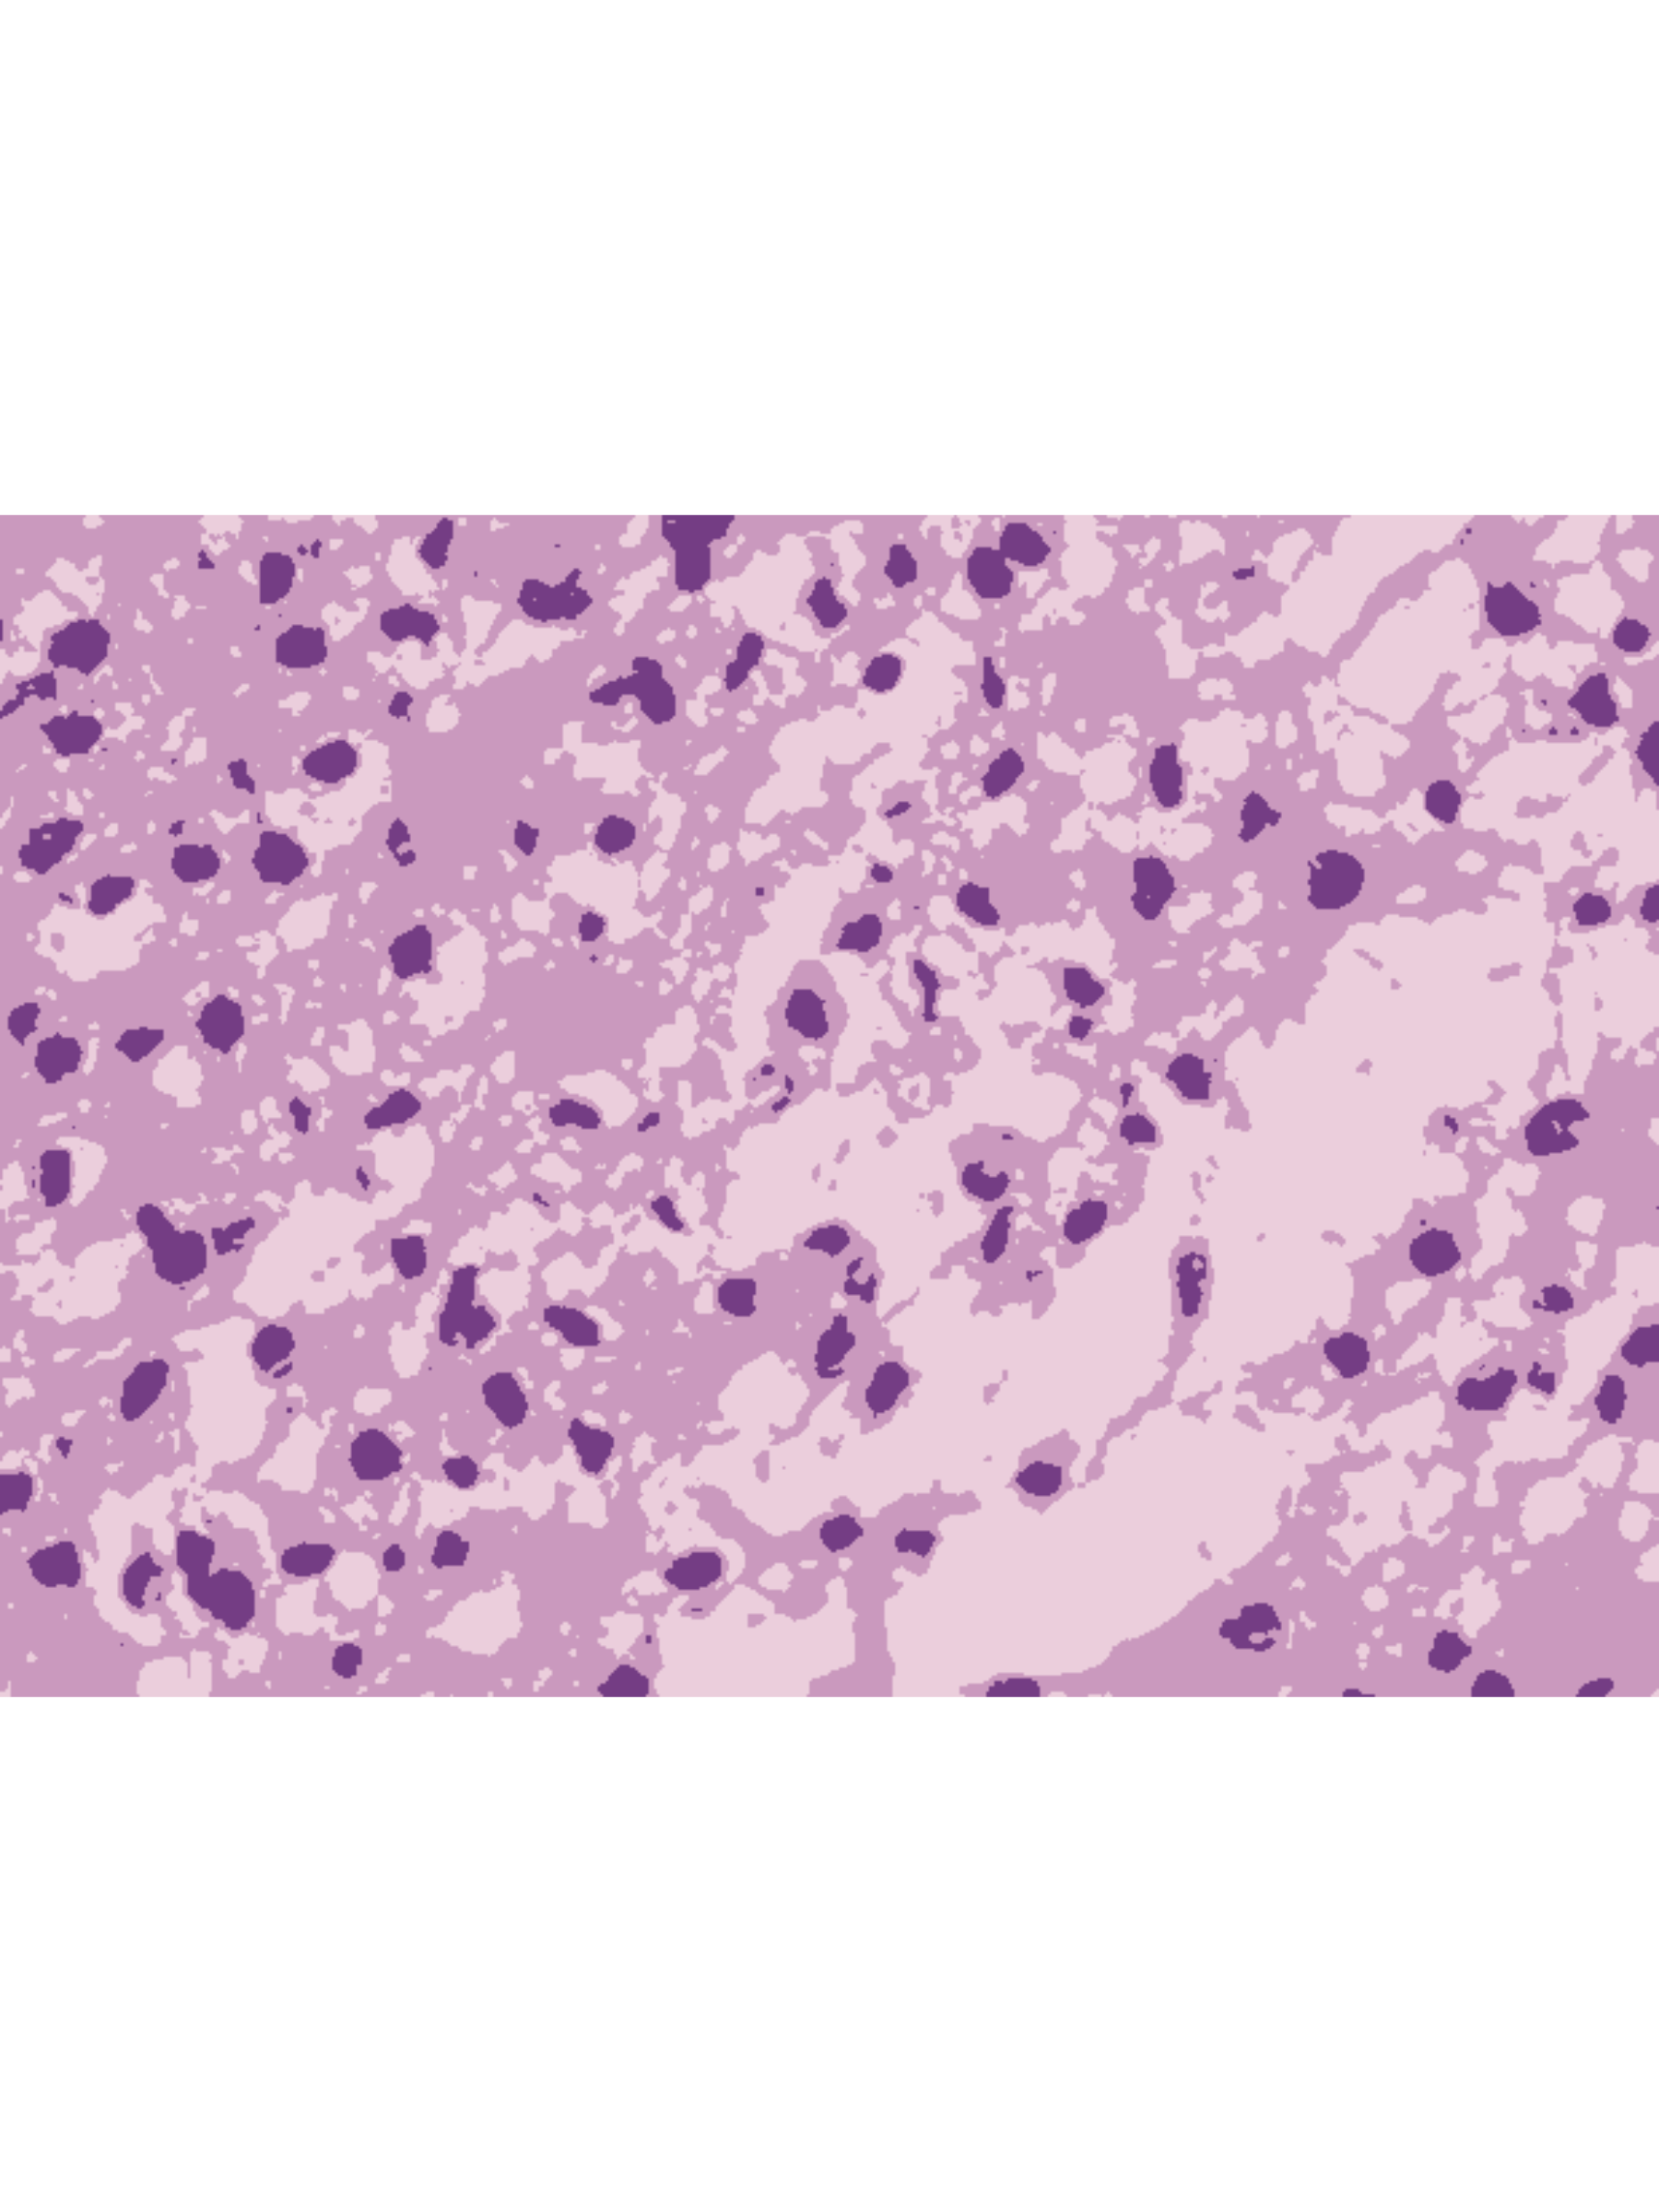

In [15]:
grid.raster(histSlideSegmented)

In [16]:
100* summary(as.factor(dfSegmented$cluster)) / nrow(dfSegmented)

1                      2                      3 
40.0129680305078423430  7.4599144989174988041 52.5271174705746588529